# Bank Marketing - Exploratory Data Analysis

<div style="text-align: justify">
    Pada <i>Exploratory data analysis project</i> ini akan dilakukan analisis mengenai <i>Bank Marketing dataset</i> yang diperoleh dari <a href="https://www.kaggle.com/janiobachmann/bank-marketing-dataset">Kaggle</a> or <a href="https://www.kaggle.com/sonujha090/bank-marketing">Kaggle</a>. Data penelitian ini menggunakan 17 variabel berikut:

<ul>
    <li> age (numeric) </li>
    <li> job : type of job (categorical) </li>
    <li> marital : marital status (categorical) </li>
    <li> education (categorical) </li>
    <li> default: has credit in default? (binary) </li>
    <li> balance: average yearly balance, in euros (numeric) </li>
    <li> housing: has housing loan? (binary) </li>
    <li> loan: has personal loan? (binary) </li>
 - related with the last contact of the current campaign:
    <li> contact: contact communication type (categorical) </li>
    <li>day: last contact day of the month (numeric) </li>
    <li> month: last contact month of year (categorical) </li>
    <li> duration: last contact duration, in seconds (numeric) </li>
 - other attributes:
    <li> campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) </li>
    <li> pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted) </li>
    <li> previous: number of contacts performed before this campaign and for this client (numeric) </li>
    <li> poutcome: outcome of the previous marketing campaign (categorical) </li>
    <li> y - has the client subscribed a term deposit? (binary) - Output variable (desired target) </li>
<ul>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data, Setup, and Cleansing

In [2]:
df = pd.read_excel('bank-full.xlsx')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
pd.set_option('precision', 3)
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000,45211.000,45211.000,45211.000,45211.000,45211.000,45211.000
mean,40.936,1362.272,15.806,258.163,2.764,40.198,0.580
std,10.619,3044.766,8.322,257.528,3.098,100.129,2.303
min,18.000,-8019.000,1.000,0.000,1.000,-1.000,0.000
25%,33.000,72.000,8.000,103.000,1.000,-1.000,0.000
50%,39.000,448.000,16.000,180.000,2.000,-1.000,0.000
75%,48.000,1428.000,21.000,319.000,3.000,-1.000,0.000
max,95.000,102127.000,31.000,4918.000,63.000,871.000,275.000


In [7]:
df.skew()

age          0.685
balance      8.360
day          0.093
duration     3.144
campaign     4.899
pdays        2.616
previous    41.846
dtype: float64

In [8]:
for i in df.columns:
    a = df[df[i]=='?'].shape[0]
    if a > 0:
        print(i,'\t:', a)
    else:
        print(i, ': No missing value')

age : No missing value
job : No missing value
marital : No missing value
education : No missing value
default : No missing value
balance : No missing value
housing : No missing value
loan : No missing value
contact : No missing value
day : No missing value
month : No missing value
duration : No missing value
campaign : No missing value
pdays : No missing value
previous : No missing value
poutcome : No missing value
y : No missing value


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000,0.098,-0.009,-0.005,0.005,-0.024,0.001
balance,0.098,1.000,0.005,0.022,-0.015,0.003,0.017
day,-0.009,0.005,1.000,-0.030,0.162,-0.093,-0.052
duration,-0.005,0.022,-0.030,1.000,-0.085,-0.002,0.001
campaign,0.005,-0.015,0.162,-0.085,1.000,-0.089,-0.033
pdays,-0.024,0.003,-0.093,-0.002,-0.089,1.000,0.455
previous,0.001,0.017,-0.052,0.001,-0.033,0.455,1.000


Dari tabel korelasi di atas terlihat bahwa korelasi dari tiap fitur sangat kecil. Hal ini menunjukkan bahwa dari masing-masing fitur yang ditunjukkan seperti pada tabel di atas tidak memiliki pengaruh yang signifikan antara satu dengan yang lainnya.

## Data Visualization

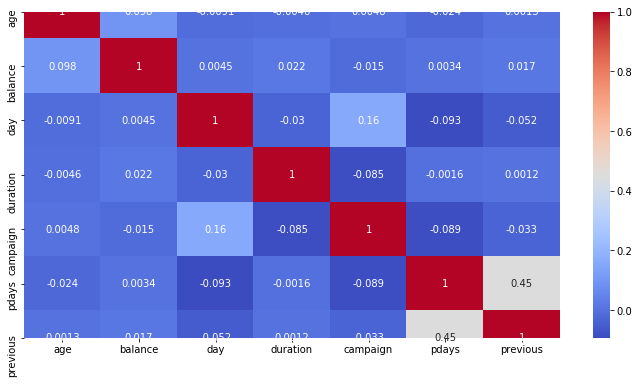

In [11]:
plt.figure(figsize=[12,6])
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

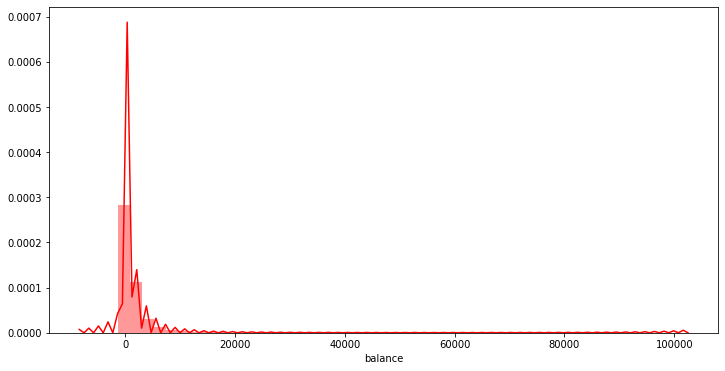

In [12]:
plt.figure(figsize=[12,6])
sns.distplot(df['balance'], color='red')

<div style="text-align: justify"> Terlihat dari distribusi *balance* yang menunjukkan saldo rata-rata tahunannya yang dimilki banyak terdistribusi pada pada saldo rata-rata tahunan nol euro. Hal ini juga dapat ditunjukkan menggunakan cara berikut: </div>

In [13]:
df['balance'].value_counts().head()

0    3514
1     195
2     156
4     139
3     134
Name: balance, dtype: int64

--

Selanjutnya akan dilihat bagaimana distribusi dari beberapa features dari dataset menggunakan fungsi seaborn.
1. Grafik distribusi dari *job*
2. Grafik distribusi dari *marital*
3. Grafik distribusi dari *education*
4. Grafik distribusi dari *default (has credit in default?)*
5. Grafik distribusi dari *housing*
6. Grafik distribusi dari *contact*
7. Grafik distribusi dari *loan*
8. Grafik distribusi dari *poutcome*
9. Grafik distribusi dari dari target (*y*)

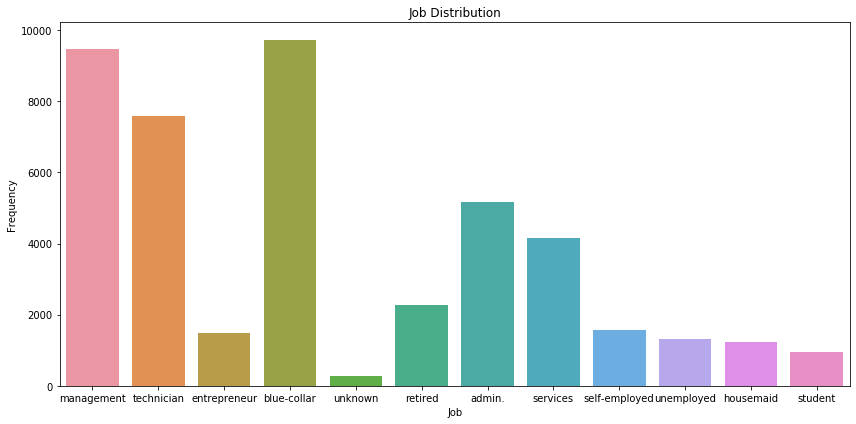

In [14]:
# 1. Grafik distribusi dari *job*
plt.figure(figsize=[12,6])
sns.countplot(df['job']).set(xlabel='Job', ylabel='Frequency', title='Job Distribution')
plt.tight_layout()

In [15]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

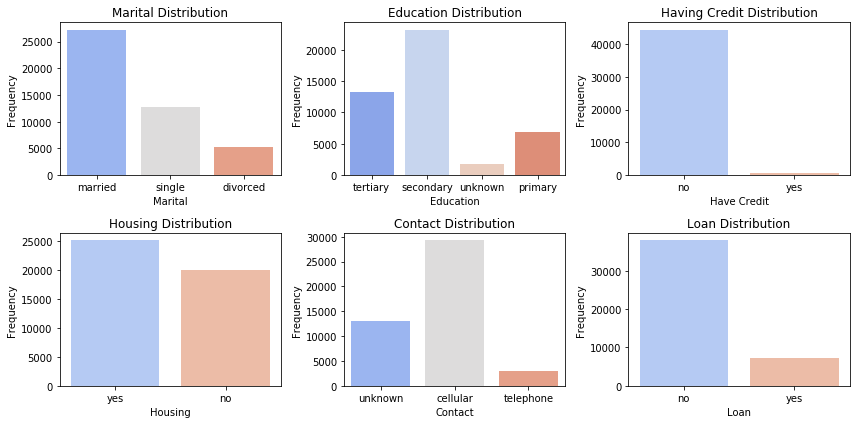

In [16]:
f, axes = plt.subplots(2,3, figsize=[12,6])
# 2. Grafik distribusi dari marital
sns.countplot(df['marital'], palette='coolwarm', ax=axes[0,0]).set(xlabel='Marital', ylabel='Frequency',
                                                                   title='Marital Distribution')
# 3. Grafik distribusi dari education
sns.countplot(df['education'], palette='coolwarm', ax=axes[0,1]).set(xlabel='Education', ylabel='Frequency',
                                                                     title='Education Distribution')
# 4. Grafik distribusi dari default (has credit in default?)
sns.countplot(df['default'], palette='coolwarm', ax=axes[0,2]).set(xlabel='Have Credit', ylabel='Frequency',
                                                                   title='Having Credit Distribution')
# 5. Grafik distribusi dari housing
sns.countplot(df['housing'], palette='coolwarm', ax=axes[1,0]).set(xlabel='Housing', ylabel='Frequency',
                                                                   title='Housing Distribution')
# 6. Grafik distribusi dari contact
sns.countplot(df['contact'], palette='coolwarm', ax=axes[1,1]).set(xlabel='Contact', ylabel='Frequency',
                                                                   title='Contact Distribution')
# 7. Grafik distribusi dari loan
sns.countplot(df['loan'], palette='coolwarm', ax=axes[1,2]).set(xlabel='Loan', ylabel='Frequency',
                                                                title='Loan Distribution')
plt.tight_layout()

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'POutcome'),
 Text(0.5, 1.0, 'POutcome Distribution')]

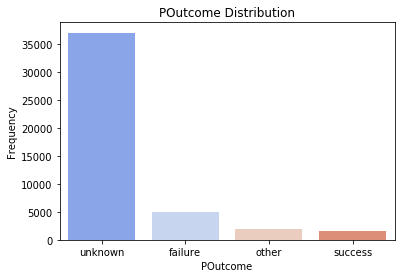

In [17]:
# 8. Grafik distribusi dari poutcome
sns.countplot(df['poutcome'], palette='coolwarm').set(xlabel='POutcome', ylabel='Frequency', title='POutcome Distribution')

In [18]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

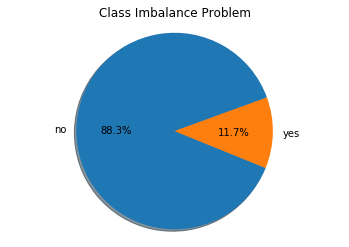

In [19]:
# 9. Grafik distribusi dari dari target (y)
yes = 0
no = 0
for i in df['y']:
    if i=='yes':
        yes = yes+1
    else:
        no = no+1

no_new = no/(no+yes)
yes_new = yes/(no+yes)
sizes = [no_new,yes_new]
sizes

plot = plt.pie(sizes, labels = ['no','yes'],autopct='%1.1f%%', shadow=True, startangle=20)
plt.axis('equal') 
plt.title("Class Imbalance Problem")
plt.show()

<div style="text-align: justify"> Dapat disimpulkan dari hasil <i>pie chart</i> di atas bahwa terjadi <i>imbalance</i> antara yang memiliki klien berlangganan desposito berjangka dan tidak memiliki klien sama sekali. Tentu saja hal ini akan mempengaruhi pada saat melakukan prediksi karena pada dasarnya semakin besar terjadinya <i>imbalance data</i> maka secara mudahnya dapat disimpulkan prediksi yang akan dihasilkan memberikan pilihan yang bergantung pada nilai yang besar. Dalam kasus ini (melihat <i>pie chart</i> di atas akan memberikan hasil <i>no</i>. Namun coba abaikan terlebih dahulu dan kita lanjutkan pada analisis data selanjutnya. </div>

In [20]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [21]:
dmap = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 
       'nov':11, 'dec':12}
df['month'] = df['month'].map(dmap)

In [22]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no


In [23]:
byday = df.groupby('day').count()
byday.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
day,,,,,,,,,,,,,,,,
1,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322,322
2,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293
3,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079


In [24]:
bymonth = df.groupby('month').count()
bymonth.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
month,,,,,,,,,,,,,,,,
1,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403
2,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649
3,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477


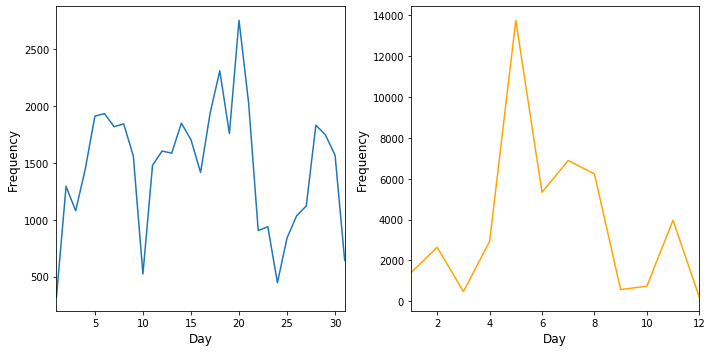

In [25]:
f, axes = plt.subplots(1,2,figsize=[10,5])
bal_day = byday['balance'].plot(ax=axes[0])
bal_day.set_xlabel('Day', fontsize=12)
bal_day.set_ylabel('Frequency', fontsize=12)

bal_month = bymonth['balance'].plot(color='orange', ax=axes[1])
bal_month.set_xlabel('Day', fontsize=12)
bal_month.set_ylabel('Frequency', fontsize=12)

plt.tight_layout()

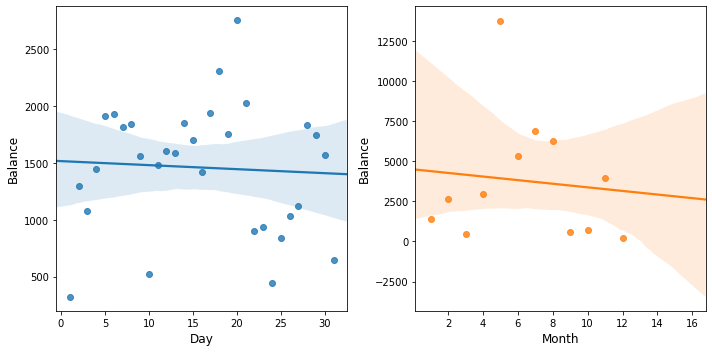

In [26]:
f, axes = plt.subplots(1,2, figsize=[10,5])
db_reg = sns.regplot(x='day', y='balance', data=byday.reset_index(), ax=axes[0])
db_reg.set_xlabel('Day', fontsize=12)
db_reg.set_ylabel('Balance', fontsize=12)

mb_reg = sns.regplot(x='month', y='balance', data=bymonth.reset_index(), ax=axes[1])
mb_reg.set_xlabel('Month', fontsize=12)
mb_reg.set_ylabel('Balance', fontsize=12)

plt.tight_layout()

Terlihat dari grafik di atas hubungan antara <i>Day</i> vs <i>Balance</i> dan <i>Month</i> vs <i>Balance</i> memiliki hubungan regresi yang menurun artinya bahwa semakin bertambahnya <i>Day</i> maupun <i>Month</i> maka <i>Balance</i> atau saldo rata-rata tahunan semakin berkurang. Hubungun seperti ini juga ditunjukkan oleh fitur lainnya.

--

In [27]:
by_jdm = df.groupby(by=['job','default']).count()['marital'].unstack()
by_jdm

default,no,yes
job,,
admin.,5097,74
blue-collar,9531,201
entrepreneur,1432,55
housemaid,1218,22
management,9294,164
retired,2238,26
self-employed,1546,33
services,4079,75
student,935,3


In [28]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no


In [29]:
by_jmd = df.groupby(by=['job','marital']).count()['default'].unstack()
by_jmd

marital,divorced,married,single
job,,,
admin.,750,2693,1728
blue-collar,750,6968,2014
entrepreneur,179,1070,238
housemaid,184,912,144
management,1111,5400,2947
retired,425,1731,108
self-employed,140,993,446
services,549,2407,1198
student,6,54,878


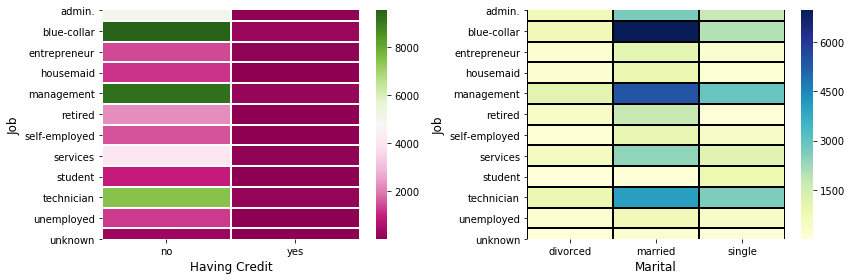

In [30]:
f, axes = plt.subplots(1,2,figsize=[12,4])

hc = sns.heatmap(by_jdm, cmap='PiYG', ax=axes[0], lw=1)
hc.set_xlabel('Having Credit', fontsize=12)
hc.set_ylabel('Job', fontsize=12)

mar_job = sns.heatmap(by_jmd, cmap='YlGnBu', ax=axes[1], linecolor='black', lw=1)
mar_job.set_xlabel('Marital', fontsize=12)
mar_job.set_ylabel('Job', fontsize=12)

plt.tight_layout()

<div style="text-align: justify">
Jika kita ingin mengamati banyaknya pemilik kredit berdasarkan pekerjaan dan status pernikahan maka dapat ditampilkan seperti pada grafik kiri di atas. terlihat bahwa sangat sedikit sekali pemilik kredit. Dilihat dari grafik tersebut yang tidak memilik kredit terbanyak ditunjukkan oleh beberapa yang memiliki pekerjaan mulai dari <i>blue-collar</i> dan <i> management</i>, <i>technician</i>, <i>admin</i>, dst.
</div>

<div style="text-align: justify">
Jika kita ingin mengamati status pernikahan berdasarkan pekerjaan dan memiliki atau tidaknya kredit maka dapat ditunjukkan oleh grafik kanan di atas. Dari grafik tersebut dapat disimpulkan bahwa beberapa orang yang bekerja sebagai <i>blue-collar</i> dengan status <i>married</i> memiliki jumlah terbanyak. Kemudian disusul dengan pekerjaan <i>management</i> dengan status <i>married</i>, <i>technician</i> dengan status <i>married</i>.
</div>

--

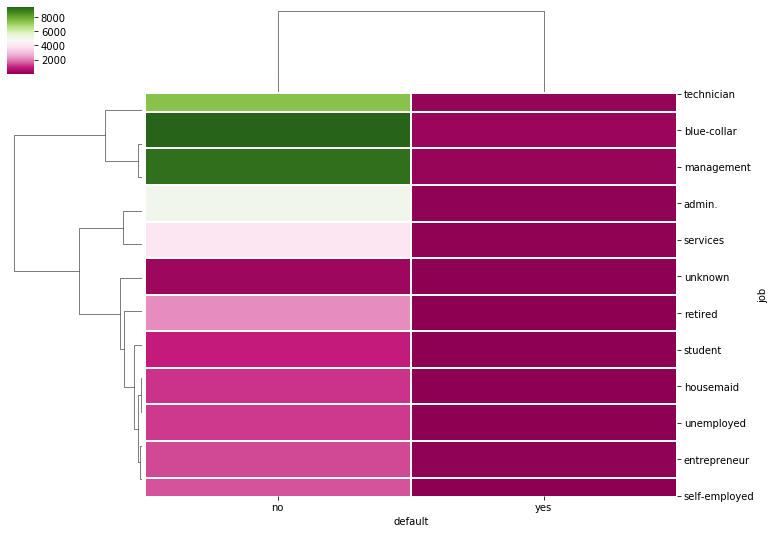

In [31]:
hc_cluster = sns.clustermap(by_jdm, cmap='PiYG', figsize=[12,9], lw=1)

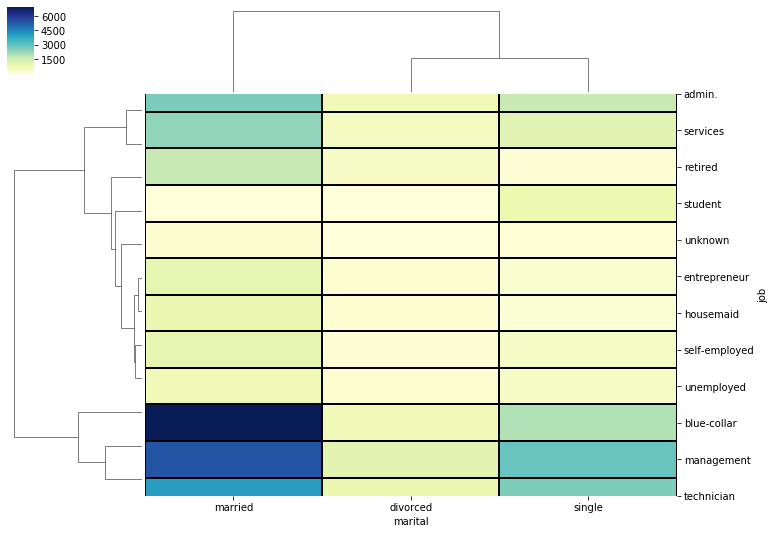

In [32]:
sns.clustermap(by_jmd, cmap='YlGnBu', figsize=[12,9], linecolor='black', lw=1)

In [33]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no


In [34]:
by_jeb = df.groupby(by=['job','education']).count()['y'].unstack()
by_jeb

education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4219,572,171
blue-collar,3758,5371,149,454
entrepreneur,183,542,686,76
housemaid,627,395,173,45
management,294,1121,7801,242
retired,795,984,366,119
self-employed,130,577,833,39
services,345,3457,202,150
student,44,508,223,163


In [35]:
by_meb = df.groupby(by=['marital','education']).count()['y'].unstack()
by_meb

education,primary,secondary,tertiary,unknown
marital,,,,
divorced,752,2815,1471,169
married,5246,13770,7038,1160
single,853,6617,4792,528


Text(452.23636363636354, 0.5, 'Marital')

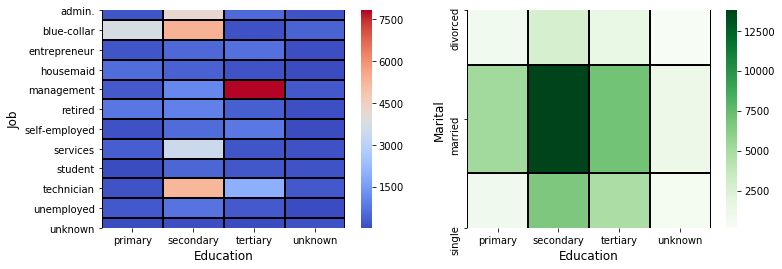

In [36]:
f, axes = plt.subplots(1,2,figsize=[12,4])

edu = sns.heatmap(by_jeb, cmap='coolwarm', ax=axes[0], linecolor='black', lw=1)
edu.set_xlabel('Education', fontsize=12)
edu.set_ylabel('Job', fontsize=12)

edu_mar = sns.heatmap(by_meb, cmap='Greens', ax=axes[1], linecolor='black', lw=1)
edu_mar.set_xlabel('Education', fontsize=12)
edu_mar.set_ylabel('Marital', fontsize=12)

<div style="text-align: justify">
    Jika kita ingin mengetahui distribusi pekerjaan dan status pernikahan seseorang berdasarkan <i>balance</i> atau saldo rata-rata tahunan dapat ditunjukkan oleh grafik kiri di atas bahwa beberapa orang yang bekerja sebagai <i>management</i> dengan pendidikan <i>tertiary</i> memiliki jumlah terbanyak. Kemudian disusul oleh pekerjaan <i>blue-collar</i> dengan pendidikan <i>secondary</i>, <i>technician</i> dengan pendidikan <i>secondary</i>, dst. Untuk kasus berdasarkan <i>target class</i> atau memiliki klien berlangganan deposito berjangka atau tidak, distribusi terbanyak dimiliki oleh seseorang dengan pekerjaan <i>management</i> dan berpendidikan <i>tertiary</i>. Kemudian pekerjaan <i>blue-collar</i> dengan pendidikan <i>secondary</i>, <i>technician</i> dengan pendidikan <i>secondary</i>, dst.
</div>

<div style="text-align: justify">
Jika kita ingin mengetahui distribusi status pernikahan dan jenjang pendidikan berdasarkan <i>balance</i> atau saldo rata-rata tahunan dapat ditunjukkan oleh grafik kanan di atas bahwa beberapa orang dengan status pernikahan <i>married</i> dengan pendidikan <i>secondary</i> memiliki jumlah terbanyak. Kemudian disusul dengan yang memiliki status pernikahan <i>married</i> dengan pendidikan <i>tertiary</i>, kemudian dengan status pernikahan <i>single</i> dengan pendidikan <i>secondary</i>, dst. Hal tersebut juga berlaku untuk kasus berdasarkan <i>target class</i> atau yang memiliki klien berlangganan deposito berjangka atau tidak.
</div>

--

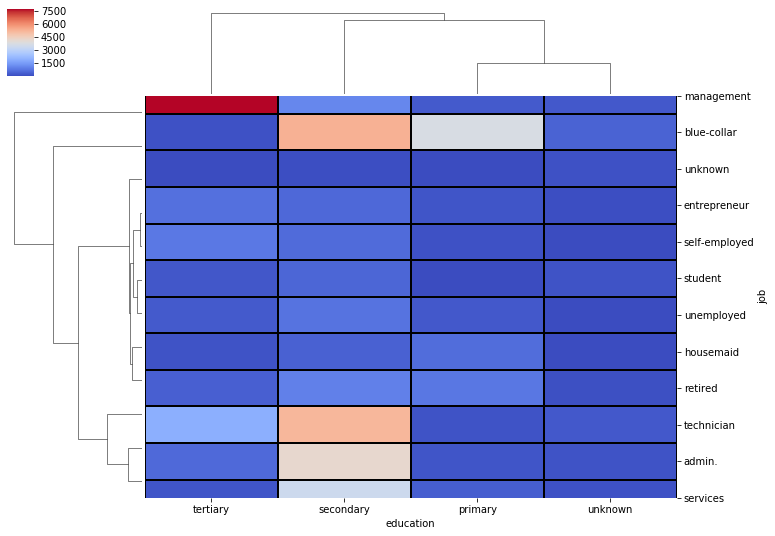

In [37]:
sns.clustermap(by_jeb, cmap='coolwarm', figsize=[12,9], linecolor='black', lw=1)

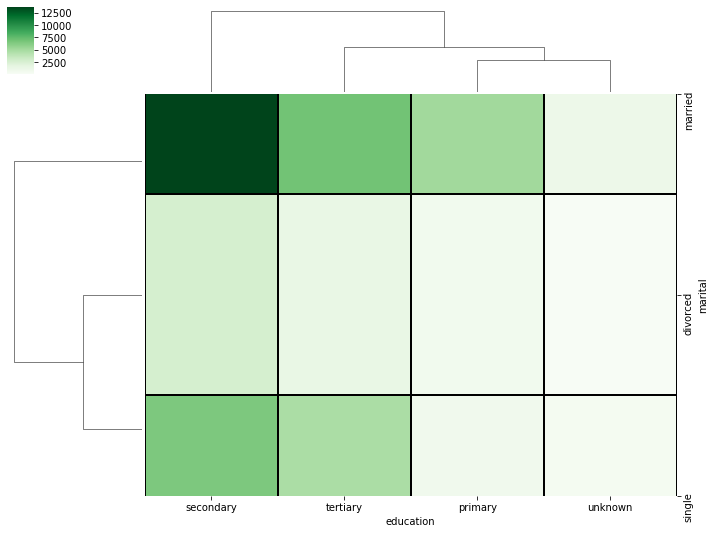

In [38]:
sns.clustermap(by_meb, cmap='Greens', figsize=[12,9], linecolor='black', lw=1)

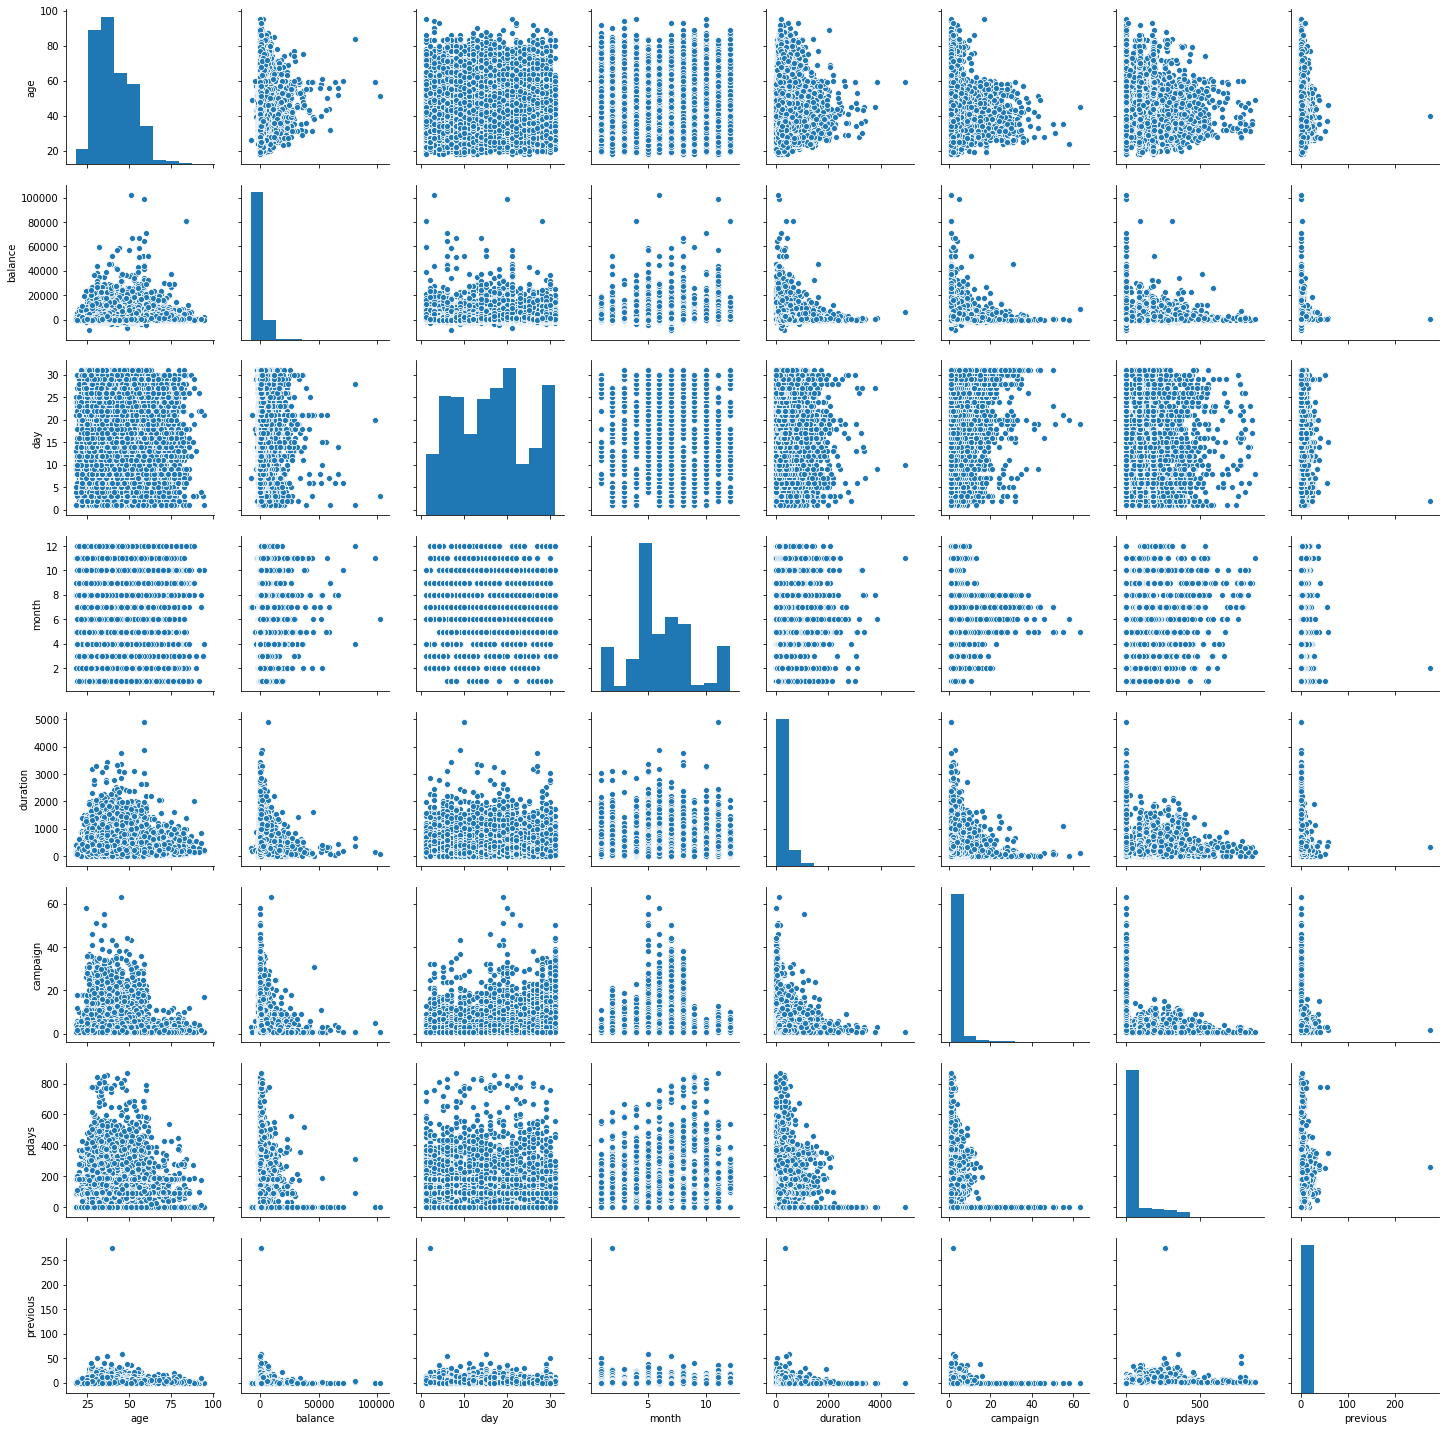

In [39]:
sns.pairplot(df)

<div style="text-align: justify">
Grafik di atas adalah visualisasi dari korelasi fitur. Sebenarnya hasilnya sama seperti pada tabel korelasi sebelumnya yang menunjukkan bahwa masing-masing fitur dalam bentuk int tidak memiliki pengaruh yang signifikan antara satu dengan yang lainnya. Bedanya dengan hasil tabel korelasi sebelumnya bahwa grafik di atas hanya dinyatakan dalam visualisasi gambar.
</div>

In [40]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no


In [41]:
a = df[(df['month']==1) & (df['day']==7)]
a

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
42593,51,technician,divorced,tertiary,no,363,yes,no,unknown,7,1,7,1,-1,0,unknown,no
42594,33,admin.,divorced,secondary,no,212,yes,no,unknown,7,1,23,1,-1,0,unknown,no
42595,45,unemployed,married,secondary,no,891,yes,no,unknown,7,1,118,1,-1,0,unknown,yes
42596,40,admin.,divorced,secondary,no,212,no,no,unknown,7,1,176,1,-1,0,unknown,no


In [42]:
abc = df.groupby(by=['month', 'day']).count()['y'].unstack()
abc

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,2.0,4.0,5.0,NaN,NaN,...,1.0,NaN,NaN,18.0,11.0,22.0,434.0,554.0,248.0,NaN
2,9.0,517.0,344.0,463.0,442.0,241.0,NaN,22.0,212.0,39.0,...,15.0,18.0,23.0,15.0,36.0,36.0,NaN,NaN,NaN,NaN
3,2.0,48.0,29.0,15.0,43.0,6.0,NaN,14.0,22.0,27.0,...,9.0,13.0,12.0,15.0,23.0,22.0,NaN,7.0,24.0,14.0
4,47.0,50.0,62.0,NaN,19.0,72.0,84.0,110.0,86.0,NaN,...,50.0,41.0,15.0,NaN,19.0,39.0,19.0,30.0,325.0,NaN
5,NaN,NaN,NaN,241.0,704.0,820.0,891.0,841.0,429.0,6.0,...,74.0,435.0,9.0,101.0,575.0,582.0,543.0,442.0,441.0,7.0
6,106.0,511.0,457.0,331.0,430.0,398.0,5.0,29.0,347.0,1.0,...,25.0,32.0,34.0,41.0,46.0,52.0,18.0,18.0,60.0,NaN
7,73.0,74.0,101.0,91.0,7.0,18.0,389.0,400.0,349.0,317.0,...,327.0,342.0,308.0,301.0,19.0,17.0,381.0,370.0,409.0,580.0
8,1.0,25.0,16.0,230.0,244.0,305.0,353.0,328.0,13.0,68.0,...,336.0,1.0,17.0,293.0,278.0,282.0,382.0,258.0,1.0,37.0
9,51.0,24.0,35.0,30.0,2.0,28.0,43.0,41.0,44.0,14.0,...,19.0,29.0,11.0,15.0,1.0,10.0,10.0,14.0,10.0,NaN


In [43]:
abc.isnull().sum()

day
1     4
2     2
3     3
4     2
5     1
6     1
7     3
8     0
9     1
10    2
11    1
12    1
13    0
14    2
15    1
16    1
17    1
18    1
19    3
20    3
21    2
22    0
23    2
24    1
25    2
26    2
27    0
28    3
29    2
30    1
31    6
dtype: int64

In [44]:
for i in abc.columns:
    a = abc[abc[i].isnull()].shape[0]
    if a>0 and abc[i].dtypes in ['float', 'int']:
        abc.fillna(abc[abc[i].notnull()].mean(), inplace=True)

In [45]:
abc

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,40.25,157.125,149.143,166.571,148.75,2.00,4.000,5.0,134.5,66.857,...,1.0,62.625,52.875,18.000,11.000,22.0,434.0,554.000,248.000,158.75
2,9.00,517.000,344.000,463.000,442.00,241.00,149.333,22.0,212.0,39.000,...,15.0,18.000,23.000,15.000,36.000,36.0,139.5,105.143,122.857,158.75
3,2.00,48.000,29.000,15.000,43.00,6.00,149.333,14.0,22.0,27.000,...,9.0,13.000,12.000,15.000,23.000,22.0,139.5,7.000,24.000,14.00
4,47.00,50.000,62.000,166.571,19.00,72.00,84.000,110.0,86.0,66.857,...,50.0,41.000,15.000,99.571,19.000,39.0,19.0,30.000,325.000,158.75
5,40.25,157.125,149.143,241.000,704.00,820.00,891.000,841.0,429.0,6.000,...,74.0,435.000,9.000,101.000,575.000,582.0,543.0,442.000,441.000,7.00
6,106.00,511.000,457.000,331.000,430.00,398.00,5.000,29.0,347.0,1.000,...,25.0,32.000,34.000,41.000,46.000,52.0,18.0,18.000,60.000,158.75
7,73.00,74.000,101.000,91.000,7.00,18.00,389.000,400.0,349.0,317.000,...,327.0,342.000,308.000,301.000,19.000,17.0,381.0,370.000,409.000,580.00
8,1.00,25.000,16.000,230.000,244.00,305.00,353.000,328.0,13.0,68.000,...,336.0,1.000,17.000,293.000,278.000,282.0,382.0,258.000,1.000,37.00
9,51.00,24.000,35.000,30.000,2.00,28.00,43.000,41.0,44.0,14.000,...,19.0,29.000,11.000,15.000,1.000,10.0,10.0,14.000,10.000,158.75


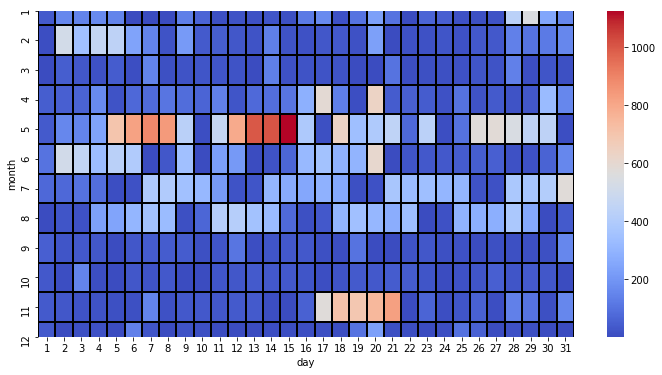

In [46]:
plt.figure(figsize=[12,6])
sns.heatmap(abc, cmap='coolwarm', linecolor='black', lw=1)

Grafik di atas menunjukkan ada atau tidaknya klien yang berlangganan deposito berjangka berdasarkan bulan dan hari. Distribusi terbanyak ditunjukkan pada hari ke-15 pada bulan ke-5 (Mei). Kemudian diikuti oleh hari ke-14 dan 13 pada bulan Mei, dst.

--

In [47]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no


In [48]:
df_new = df.copy()
Y = pd.get_dummies(df_new['y'], drop_first=True)
df_new.drop('y', axis=1, inplace=True)
df_new = pd.concat([df_new,Y], axis=1)
df_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,yes
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,0


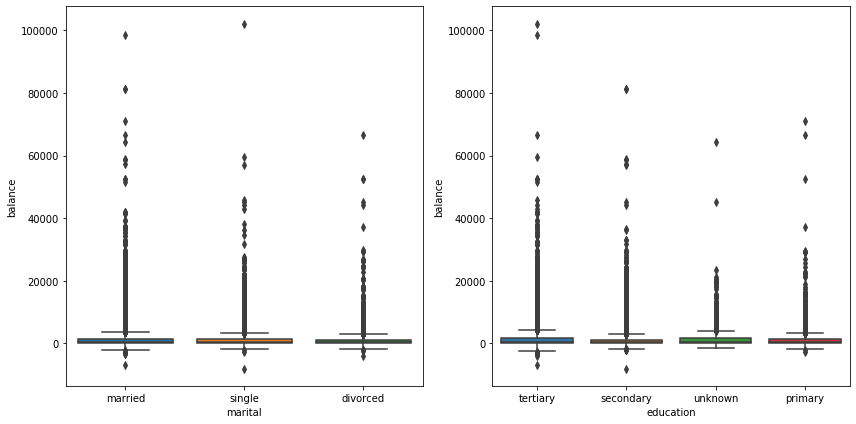

In [49]:
#plt.figure(figsize=[12,6])
f, axes = plt.subplots(1,2,figsize=[12,6])
sns.boxplot(x='marital', y='balance', data=df_new, ax=axes[0])
sns.boxplot(x='education', y='balance', data=df_new, ax=axes[1])
plt.tight_layout()

In [50]:
# membuat DataFrame berdasarkan fitur target class (yes)=1
df_yes = df_new[df_new['yes']==1].reset_index()

byyes = df_yes.groupby(by=['month', 'day']).count()['yes'].unstack()
byyes.head()

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,NaN,6.0,3.0,11.0,31.0,21.0,12.0,NaN
2,3.0,38.0,42.0,45.0,33.0,16.0,NaN,10.0,27.0,22.0,...,4.0,12.0,8.0,8.0,15.0,17.0,NaN,NaN,NaN,NaN
3,NaN,25.0,20.0,8.0,21.0,5.0,NaN,8.0,18.0,13.0,...,7.0,8.0,5.0,9.0,6.0,12.0,NaN,2.0,9.0,6.0
4,13.0,6.0,5.0,NaN,12.0,15.0,6.0,28.0,13.0,NaN,...,25.0,22.0,6.0,NaN,8.0,14.0,6.0,16.0,152.0,NaN
5,NaN,NaN,NaN,66.0,32.0,43.0,44.0,34.0,12.0,1.0,...,23.0,12.0,6.0,38.0,48.0,37.0,22.0,16.0,27.0,1.0


In [51]:
# membuat DataFrame berdasarkan fitur target class (no)=0
df_no = df_new[df_new['yes']==0].reset_index()
byno = df_no.groupby(by=['month', 'day']).count()['yes'].unstack()
byno.head()

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,2.0,3.0,3.0,NaN,NaN,...,1.0,NaN,NaN,12.0,8.0,11.0,403.0,533.0,236.0,NaN
2,6.0,479.0,302.0,418.0,409.0,225.0,NaN,12.0,185.0,17.0,...,11.0,6.0,15.0,7.0,21.0,19.0,NaN,NaN,NaN,NaN
3,2.0,23.0,9.0,7.0,22.0,1.0,NaN,6.0,4.0,14.0,...,2.0,5.0,7.0,6.0,17.0,10.0,NaN,5.0,15.0,8.0
4,34.0,44.0,57.0,NaN,7.0,57.0,78.0,82.0,73.0,NaN,...,25.0,19.0,9.0,NaN,11.0,25.0,13.0,14.0,173.0,NaN
5,NaN,NaN,NaN,175.0,672.0,777.0,847.0,807.0,417.0,5.0,...,51.0,423.0,3.0,63.0,527.0,545.0,521.0,426.0,414.0,6.0


In [52]:
# mengganti nilai NaN pada DataFrame byyes menggunakan nilai rata-rata dari masing-masing fitur
for i in byyes.columns:
    a = byyes[byyes[i].isnull()].shape[0]
    if (a>0) and byyes[i].dtypes in ['float','int']:
        byyes.fillna(byyes[byyes[i].notnull()].mean(), inplace=True)

# mengganti nilai NaN pada DataFrame byno menggunakan nilai rata-rata dari masing-masing fitur
for i in byno.columns:
    a = byno[byno[i].isnull()].shape[0]
    if (a>0) and byno[i].dtypes in ['float','int']:
        byno.fillna(byno[byno[i].notnull()].mean(), inplace=True)

In [53]:
byyes.head(3)

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,15.0,23.667,24.4,26.75,25.5,13.5,1.0,2.0,19.833,18.0,...,17.333,17.5,7.5,6.0,3.0,11.0,31.0,21.0,12.0,12.0
2,3.0,38.000,42.0,45.00,33.0,16.0,12.8,10.0,27.000,22.0,...,4.000,12.0,8.0,8.0,15.0,17.0,13.2,16.2,44.0,12.0
3,15.0,25.000,20.0,8.00,21.0,5.0,12.8,8.0,18.000,13.0,...,7.000,8.0,5.0,9.0,6.0,12.0,13.2,2.0,9.0,6.0


In [54]:
byno.head(3)

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,29.0,135.5,127.143,144.714,126.5,2.0,3.000,3.0,117.125,53.571,...,1.0,48.5,52.857,12.0,8.0,11.0,403.0,533.0,236.000,147.5
2,6.0,479.0,302.000,418.000,409.0,225.0,131.833,12.0,185.000,17.000,...,11.0,6.0,15.000,7.0,21.0,19.0,126.0,93.0,90.143,147.5
3,2.0,23.0,9.000,7.000,22.0,1.0,131.833,6.0,4.000,14.000,...,2.0,5.0,7.000,6.0,17.0,10.0,126.0,5.0,15.000,8.0


Text(0.5, 1, 'Not Term Deposito Client')

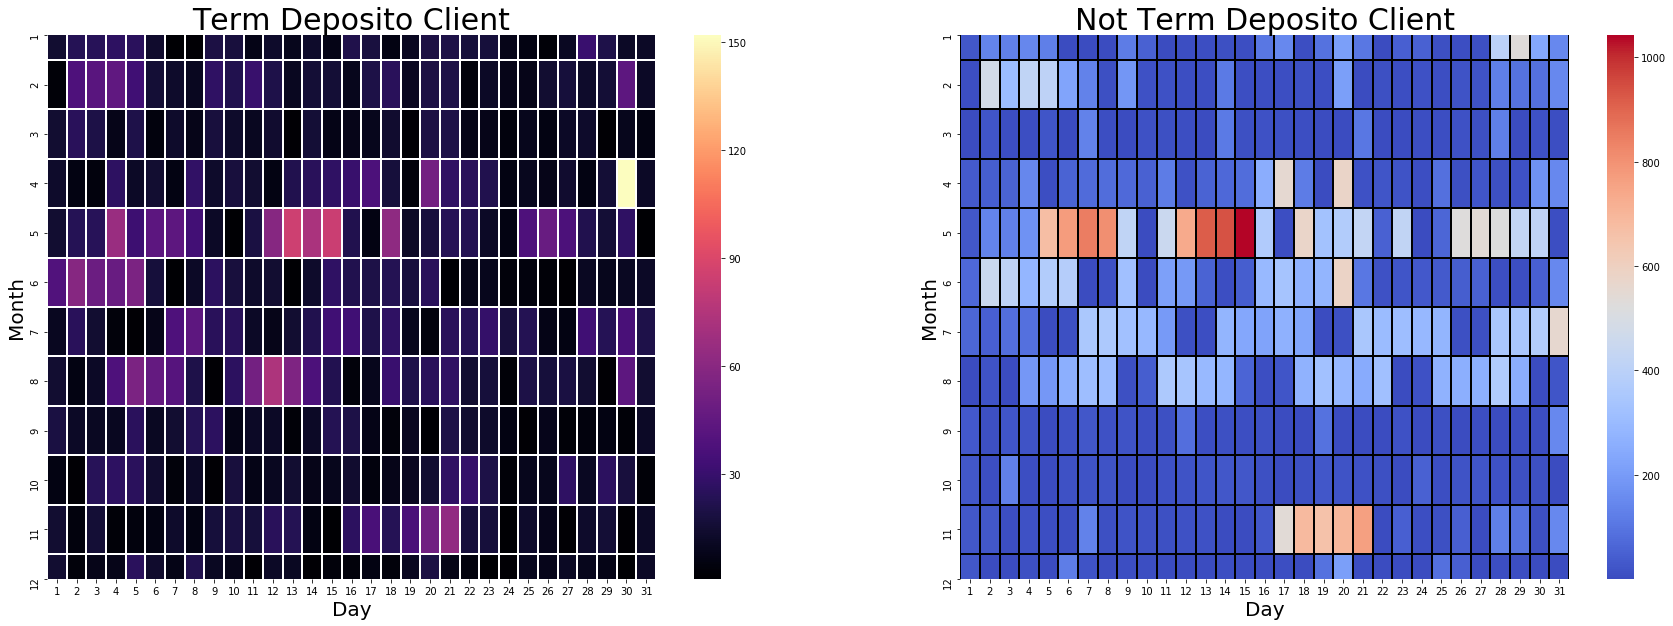

In [55]:
f, axes = plt.subplots(1,2,figsize=[30,10])

yes_map = sns.heatmap(byyes, cmap='magma', ax=axes[0], lw=1)
yes_map.set_xlabel('Day', fontsize=20)
yes_map.set_ylabel('Month', fontsize=20)
yes_map.set_title('Term Deposito Client', fontsize=30)

no_map = sns.heatmap(byno, cmap='coolwarm', ax=axes[1], linecolor='black', lw=1)
no_map.set_xlabel('Day', fontsize=20)
no_map.set_ylabel('Month', fontsize=20)
no_map.set_title('Not Term Deposito Client', fontsize=30)